In [1]:
import arcpy
import arcpy,os,fnmatch
import time
Start = time.time()
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

In [2]:
# This is the current work space
arcpy.env.workspace =  r"D:/2024/forest_planning/Annapolis/Forest.gdb"
arcpy.env.overwriteOutput = True
forest =  "D:/2024/forest_planning/Annapolis/Forest.gdb/forest"
strata =  "D:/2024/forest_planning/Annapolis/Forest.gdb/strata"
county =  "D:/2024/forest_planning/Annapolis/Forest.gdb/Counties"
streams =  "D:/2024/forest_planning/Annapolis/Forest.gdb/Streams"
lakes =  "D:/2024/forest_planning/Annapolis/Forest.gdb/Lakes"
roads =  "D:/2024/forest_planning/Annapolis/Forest.gdb/Roads"
road_class =  "D:/2024/forest_planning/Annapolis/Forest.gdb/Road_Class"
crown =  "D:/2024/forest_planning/Annapolis/Forest.gdb/crown"

In [3]:

try:
    # Use the arcpy.da.SearchCursor to iterate through the feature class
    with arcpy.da.SearchCursor(forest, "*") as cursor:
        # Get the field names
        field_names = [field.name for field in arcpy.ListFields(forest)]
        print("Field Names:", ", ".join(field_names))
        
  
except arcpy.ExecuteError:
    print(arcpy.GetMessages())

Field Names: OBJECTID, Shape, AREA, PERIMETER, FOREST_, FOREST_ID, MAPSTAND_, WETLND, LNDCLASS, FORNON, SPECIES, CRNCL, HEIGHT, ALLHEIGHT, SS_SPECIES, SS_CRNCL, SS_HEIGHT, SITE_SW, SITE_HW, AGE, AVDI_SW, AVDI_HW, AVDI, MATURITY, FLDCHK, COVER_TYPE, PHOTOYR, HECTARES, SWDBA, HWDBA, TOTBA, SWMRVOL, HWMRVOL, TOTMRVOL, SS_SWBA, SS_HWBA, SS_TOTBA, TOTSTDBA, SSSWMRVOL, SSHWMRVOL, SSTOTMRVOL, TOTSTDMRVO, MAPSHEET, STAND_, FOR_NON, SP1, SP1P, SP2, SP2P, SP3, SP3P, SP4, SP4P, WETCLASS, WC_TYPE, EUNIT, ESTAND, ID_EFOREST, Shape_Length, Shape_Area, Theme1, Ha


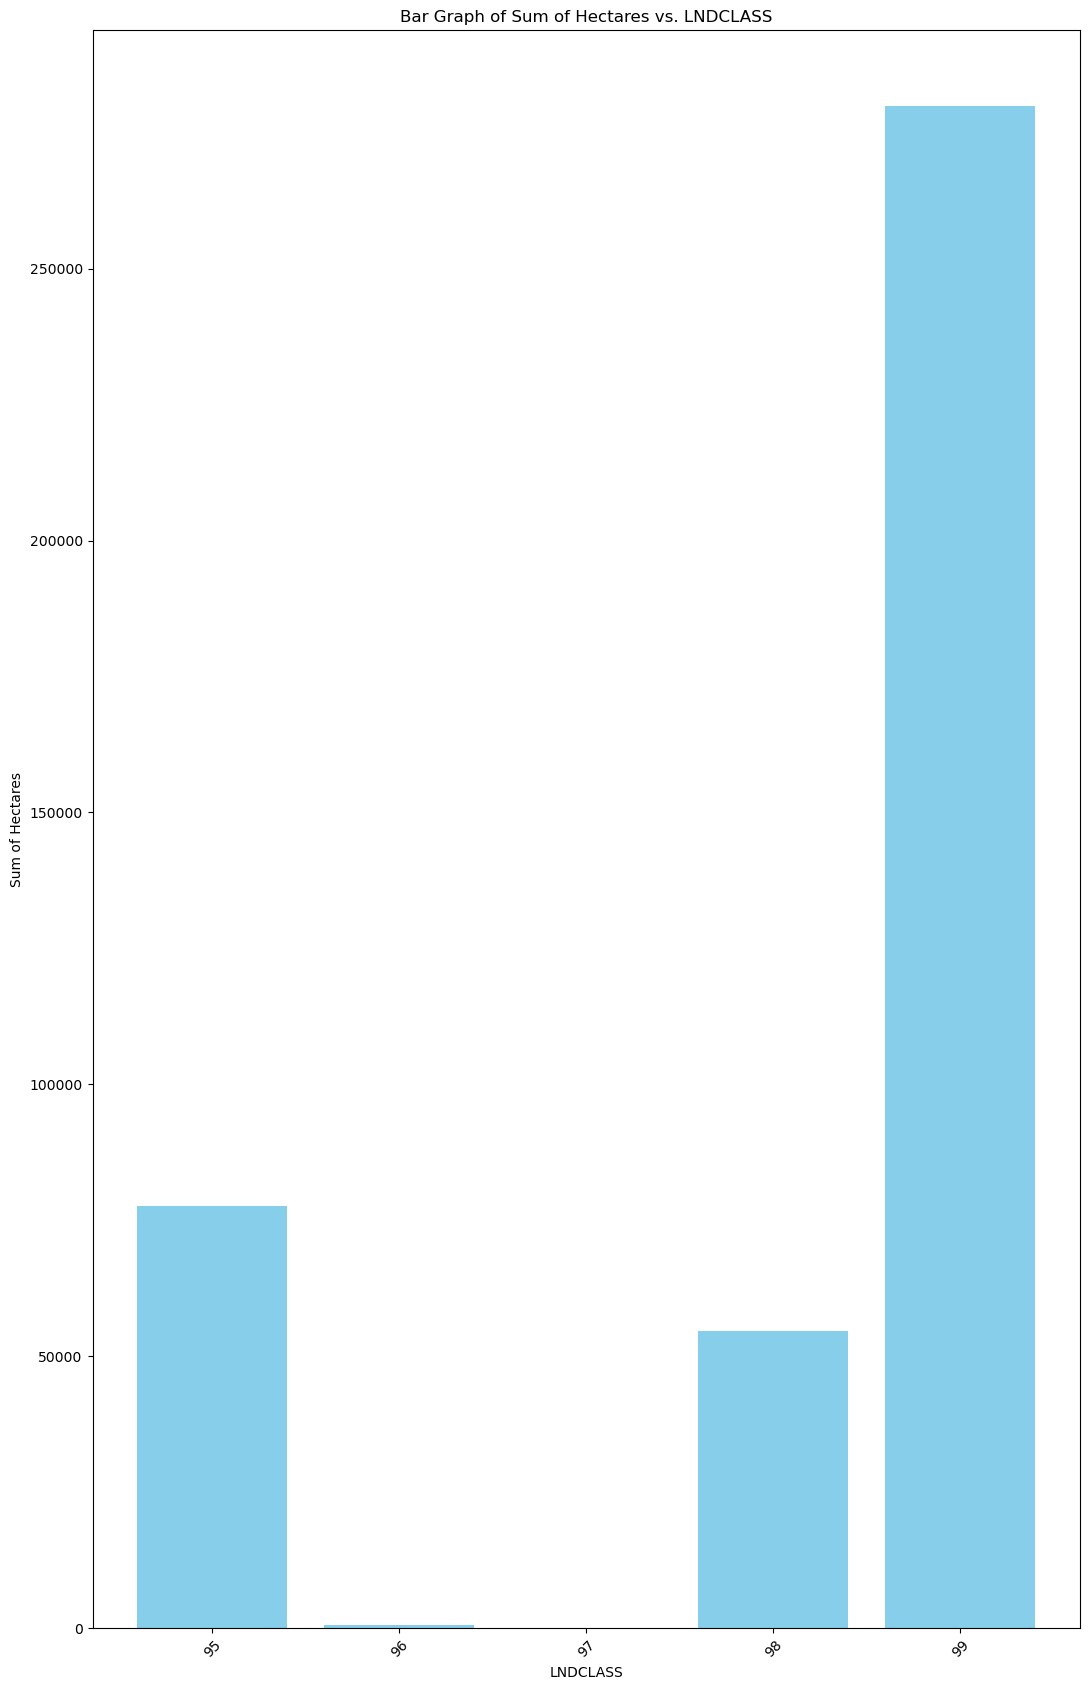

Sum of Hectares: 412762.748817876
LNDCLASS: 98 - Sum of Hectares: 54682.03999489546
LNDCLASS: 99 - Sum of Hectares: 279820.04003025405
LNDCLASS: 95 - Sum of Hectares: 77628.7787938416
LNDCLASS: 96 - Sum of Hectares: 595.6199994999915
LNDCLASS: 97 - Sum of Hectares: 36.269999384880066


In [4]:
fc = "forest"

# Fields for analysis

arcpy.AddField_management(fc, "Ha", "FLOAT")
arcpy.management.CalculateField(fc, field="Ha", expression="round(!Shape_Area!/10000,2)", expression_type="PYTHON3", code_block="", field_type="FLOAT", enforce_domains="NO_ENFORCE_DOMAINS")[0]


# Fields for analysis
hectares_field = "Ha"
other_field = "LNDCLASS"

# Dictionary to store sum of hectares for each unique value in other_field
hectares_sum_dict = {}

# Calculate the sum of hectares for each unique value in other_field
with arcpy.da.SearchCursor(fc, [other_field, hectares_field]) as cursor:
    for row in cursor:
        other_value = row[0]
        hectares_value = row[1]
        if other_value in hectares_sum_dict:
            hectares_sum_dict[other_value] += hectares_value
        else:
            hectares_sum_dict[other_value] = hectares_value

# Create lists for plotting
other_values = list(hectares_sum_dict.keys())
hectares_sums = list(hectares_sum_dict.values())

# Create a bar graph
plt.figure(figsize=(11, 17))
plt.bar(other_values, hectares_sums, color='skyblue')
plt.xlabel(other_field)
plt.ylabel('Sum of Hectares')
plt.title('Bar Graph of Sum of Hectares vs. ' + other_field)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()




input_feature_class = "forest"

# Define the fields to be used for summarization
fields = ["Ha", "LNDCLASS"]

# Create a dictionary to store the sum of hectares and fornon values
summary_dict = {"Total_Hectares": 0, "Total_LNDCLASS": 0}

# Use the SearchCursor to iterate over the features or rows
with arcpy.da.SearchCursor(input_feature_class, fields) as cursor:
    for row in cursor:
        # Add hectares and fornon values to the summary dictionary
        summary_dict["Total_Hectares"] += row[0]  # Assuming hectares_field is at index 0
  

# Print the summary
print("Sum of Hectares:", summary_dict["Total_Hectares"])





input_feature_class = "forest"

# Define the fields to be used for summarization
fields = ["Ha", "LNDCLASS"]

# Create a dictionary to store the sum of hectares for each fornon code
summary_dict = {}

# Use the SearchCursor to iterate over the features or rows
with arcpy.da.SearchCursor(input_feature_class, fields) as cursor:
    for row in cursor:
        hectares = row[0]  # Hectares value
        lndclass_code = row[1]  # Fornon code
        
        # Check if the fornon code exists in the summary dictionary
        if lndclass_code in summary_dict:
            # If exists, add hectares value to the existing sum
            summary_dict[lndclass_code] += hectares
        else:
            # If not exists, initialize the sum with hectares value
            summary_dict[lndclass_code] = hectares

# Print the summary
for lndclass_code, sum_hectares in summary_dict.items():
    print("LNDCLASS:", lndclass_code, "- Sum of Hectares:", sum_hectares)


New feature class created successfully.


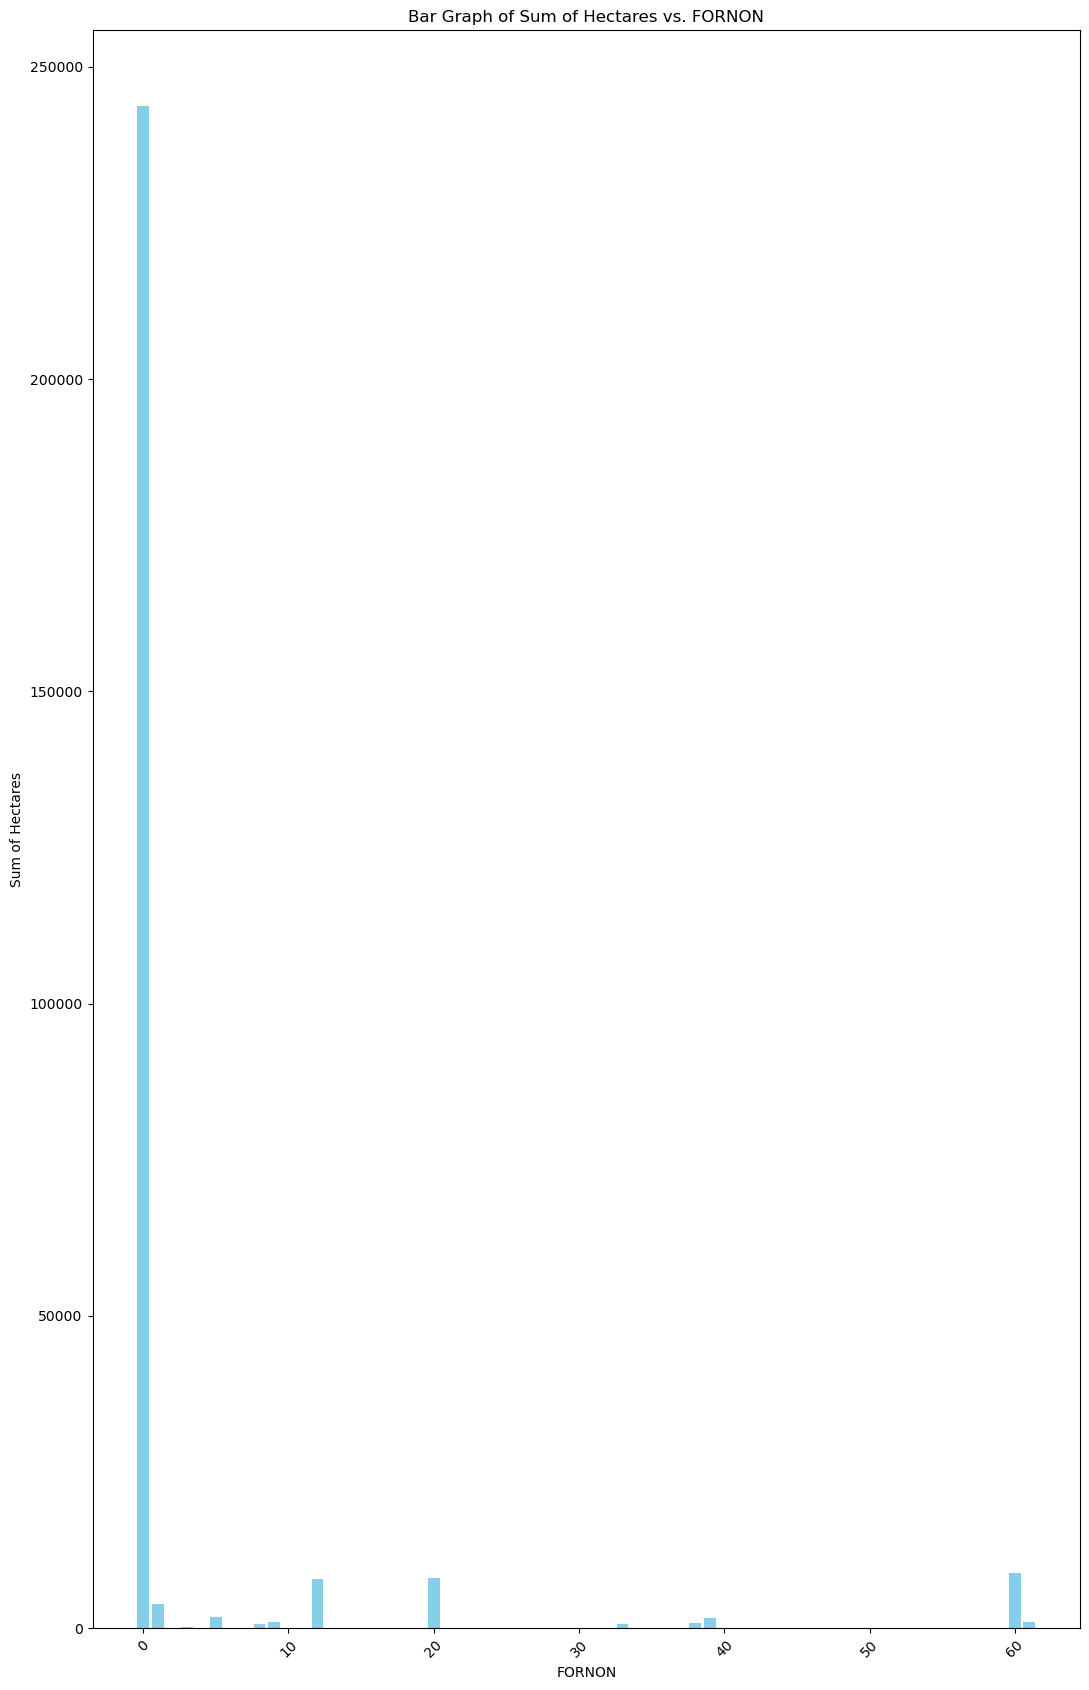

Fornon Code: 0 - Sum of Hectares: 243663.54003024846
Fornon Code: 12 - Sum of Hectares: 7878.950009858236
Fornon Code: 5 - Sum of Hectares: 1808.0599973797798
Fornon Code: 38 - Sum of Hectares: 913.2200019657612
Fornon Code: 1 - Sum of Hectares: 3865.3400088846684
Fornon Code: 61 - Sum of Hectares: 988.1899951100349
Fornon Code: 20 - Sum of Hectares: 7978.799997130409
Fornon Code: 33 - Sum of Hectares: 700.4600011408329
Fornon Code: 60 - Sum of Hectares: 8822.59999100864
Fornon Code: 7 - Sum of Hectares: 71.47999984025955
Fornon Code: 3 - Sum of Hectares: 223.28999948501587
Fornon Code: 6 - Sum of Hectares: 20.729999542236328
Fornon Code: 9 - Sum of Hectares: 1061.7099991440773
Fornon Code: 8 - Sum of Hectares: 759.5299977958202
Fornon Code: 39 - Sum of Hectares: 1587.5100003778934


In [5]:

sql_query = "FORNON in(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,20,33,38,39,60,61,62) "

try:
    # Create a new feature class containing features based on the SQL query
    arcpy.Select_analysis("forest","Forested", sql_query)
    print("New feature class created successfully.")
except arcpy.ExecuteError:
    print(arcpy.GetMessages())
    
fc="forested"    
# Fields for analysis
hectares_field = "Ha"
other_field = "FORNON"

# Dictionary to store sum of hectares for each unique value in other_field
hectares_sum_dict = {}

# Calculate the sum of hectares for each unique value in other_field
with arcpy.da.SearchCursor(fc, [other_field, hectares_field]) as cursor:
    for row in cursor:
        other_value = row[0]
        hectares_value = row[1]
        if other_value in hectares_sum_dict:
            hectares_sum_dict[other_value] += hectares_value
        else:
            hectares_sum_dict[other_value] = hectares_value

# Create lists for plotting
other_values = list(hectares_sum_dict.keys())
hectares_sums = list(hectares_sum_dict.values())

# Create a bar graph
plt.figure(figsize=(11, 17))
plt.bar(other_values, hectares_sums, color='skyblue')
plt.xlabel(other_field)
plt.ylabel('Sum of Hectares')
plt.title('Bar Graph of Sum of Hectares vs. ' + other_field)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()




input_feature_class = "Forested"

# Define the fields to be used for summarization
fields = ["Ha", "fornon"]

# Create a dictionary to store the sum of hectares for each fornon code
summary_dict = {}

# Use the SearchCursor to iterate over the features or rows
with arcpy.da.SearchCursor(input_feature_class, fields) as cursor:
    for row in cursor:
        hectares = row[0]  # Hectares value
        fornon_code = row[1]  # Fornon code
        
        # Check if the fornon code exists in the summary dictionary
        if fornon_code in summary_dict:
            # If exists, add hectares value to the existing sum
            summary_dict[fornon_code] += hectares
        else:
            # If not exists, initialize the sum with hectares value
            summary_dict[fornon_code] = hectares

# Print the summary
for fornon_code, sum_hectares in summary_dict.items():
    print("Fornon Code:", fornon_code, "- Sum of Hectares:", sum_hectares)

New feature class created successfully.


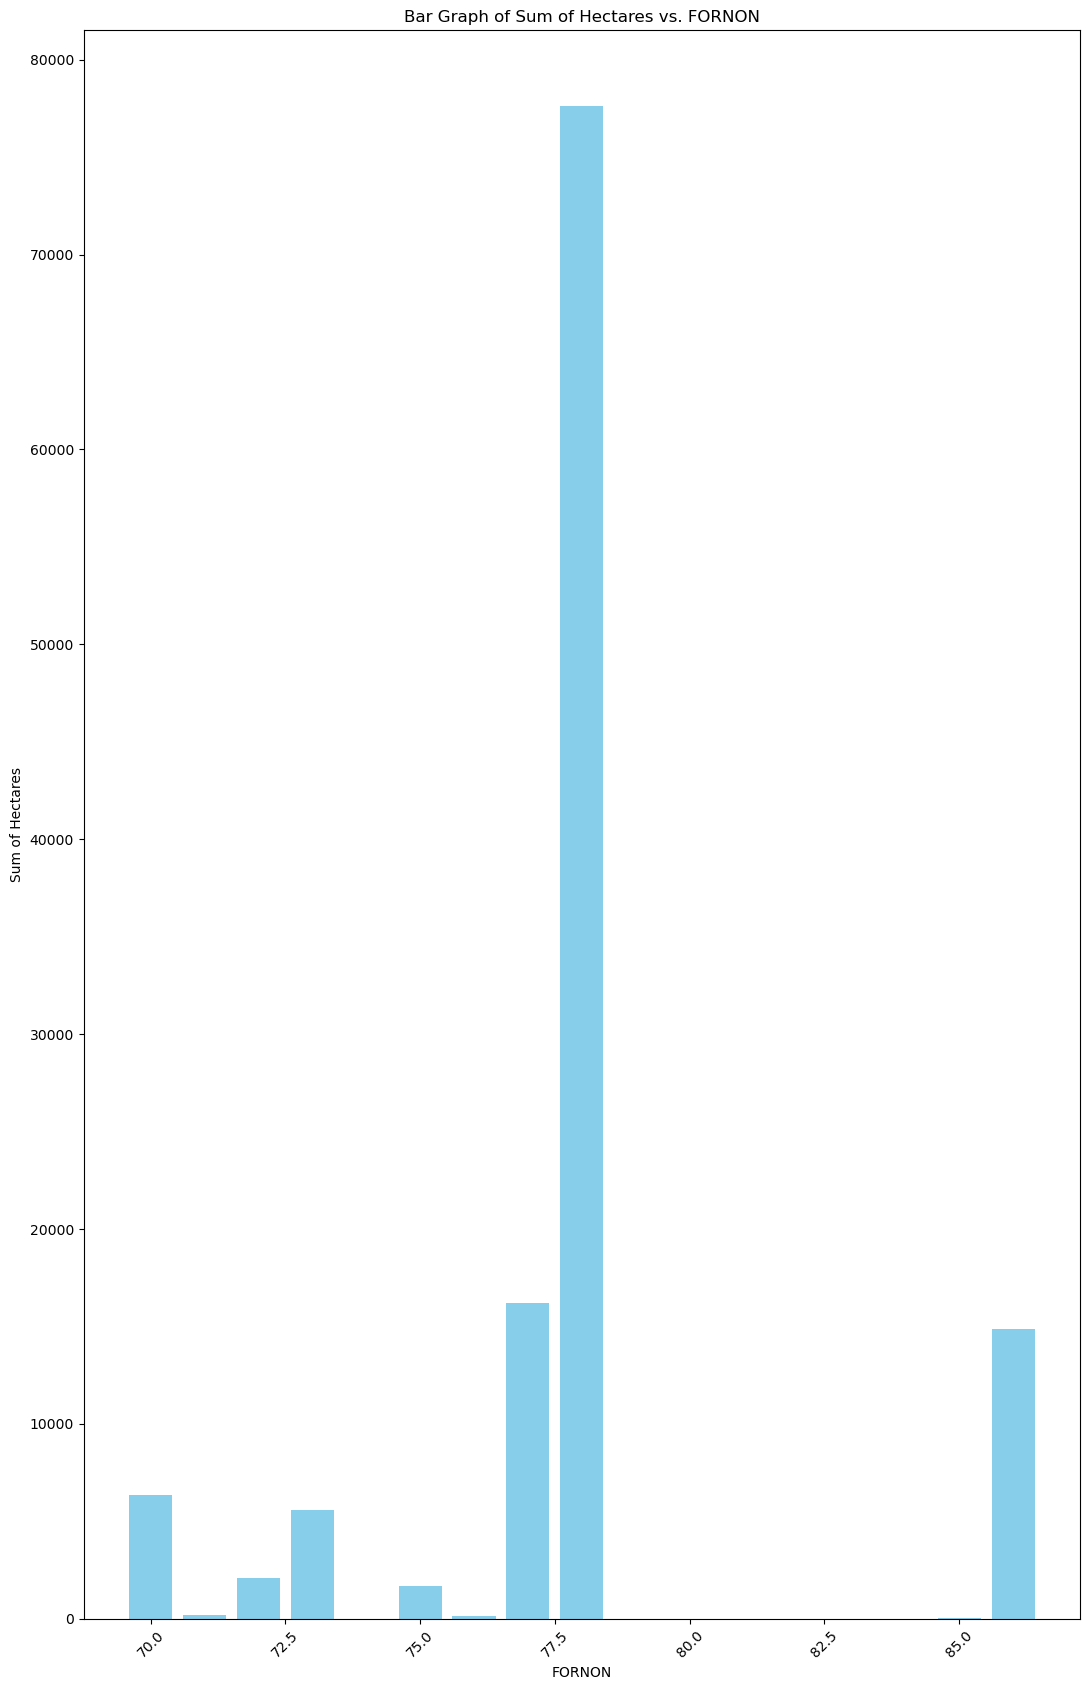

Fornon Code: 86 - Sum of Hectares: 14855.939970836043
Fornon Code: 77 - Sum of Hectares: 16194.320011040196
Fornon Code: 70 - Sum of Hectares: 6353.250000515953
Fornon Code: 78 - Sum of Hectares: 77622.03879395127
Fornon Code: 75 - Sum of Hectares: 1698.4500010814518
Fornon Code: 72 - Sum of Hectares: 2102.549997597933
Fornon Code: 73 - Sum of Hectares: 5579.930006399751
Fornon Code: 71 - Sum of Hectares: 218.93000090122223
Fornon Code: 76 - Sum of Hectares: 126.24000045657158
Fornon Code: 85 - Sum of Hectares: 56.820000648498535
Fornon Code: 84 - Sum of Hectares: 18.68999969959259
Fornon Code: 74 - Sum of Hectares: 6.739999890327454


In [6]:

sql_query = "FORNON in(70,71,72,73,74,75,76,77,78,83,84,85,86) "

try:
    # Create a new feature class containing features based on the SQL query
    arcpy.Select_analysis("forest","NonForested", sql_query)
    print("New feature class created successfully.")
except arcpy.ExecuteError:
    print(arcpy.GetMessages())
    
fc="NonForested"    
   
# Fields for analysis
hectares_field = "Ha"
other_field = "FORNON"

# Dictionary to store sum of hectares for each unique value in other_field
hectares_sum_dict = {}

# Calculate the sum of hectares for each unique value in other_field
with arcpy.da.SearchCursor(fc, [other_field, hectares_field]) as cursor:
    for row in cursor:
        other_value = row[0]
        hectares_value = row[1]
        if other_value in hectares_sum_dict:
            hectares_sum_dict[other_value] += hectares_value
        else:
            hectares_sum_dict[other_value] = hectares_value

# Create lists for plotting
other_values = list(hectares_sum_dict.keys())
hectares_sums = list(hectares_sum_dict.values())

# Create a bar graph
plt.figure(figsize=(11, 17))
plt.bar(other_values, hectares_sums, color='skyblue')
plt.xlabel(other_field)
plt.ylabel('Sum of Hectares')
plt.title('Bar Graph of Sum of Hectares vs. ' + other_field)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



input_feature_class = "NonForested"

# Define the fields to be used for summarization
fields = ["Ha", "fornon"]

# Create a dictionary to store the sum of hectares for each fornon code
summary_dict = {}

# Use the SearchCursor to iterate over the features or rows
with arcpy.da.SearchCursor(input_feature_class, fields) as cursor:
    for row in cursor:
        hectares = row[0]  # Hectares value
        fornon_code = row[1]  # Fornon code
        
        # Check if the fornon code exists in the summary dictionary
        if fornon_code in summary_dict:
            # If exists, add hectares value to the existing sum
            summary_dict[fornon_code] += hectares
        else:
            # If not exists, initialize the sum with hectares value
            summary_dict[fornon_code] = hectares

# Print the summary
for fornon_code, sum_hectares in summary_dict.items():
    print("Fornon Code:", fornon_code, "- Sum of Hectares:", sum_hectares)

In [7]:
arcpy.Delete_management("strata")

sql_query = "LNDCLASS = 99"

try:
    # Create a new feature class containing features based on the SQL query
    arcpy.Select_analysis("forest",strata, sql_query)
    print("New feature class created successfully.")
except arcpy.ExecuteError:
    print(arcpy.GetMessages())

New feature class created successfully.


In [8]:
try:
  

    arcpy.AddField_management(strata, "Theme1", "Text")
    arcpy.AddField_management(strata, "Site", "Integer")
    arcpy.AddField_management(strata, "Theme2", "Text")
    arcpy.AddField_management(strata, "Theme3", "Text")
    arcpy.AddField_management(strata, "Theme4", "Text")
    arcpy.AddField_management(strata, "Theme5", "Text")
except:
    pass
# Update cursor to detrmine Lake classification base on area and distance between Lakefeatures

fc = strata
with arcpy.da.UpdateCursor(fc, ["SP1","Theme1"]) as cursor:
    for row in cursor:
            row[1] = row[0]
            cursor.updateRow(row)
            
            
            




In [48]:
# Update cursor to detrmine Lake classification base on area and distance between Lakefeatures

fc = strata
with arcpy.da.UpdateCursor(fc, ["SITE_SW","SITE_HW","Site"]) as cursor:
  for row in cursor:
         if row[0] != None or  row[0] != 0 : 
            row[2] = row[0]
            cursor.updateRow(row)
         elif  row[2] != None or row[0] != 0:
            row[2] = row[1]
            cursor.updateRow(row)
         else:
             row[2] = row[2] 
             cursor.updateRow(row)

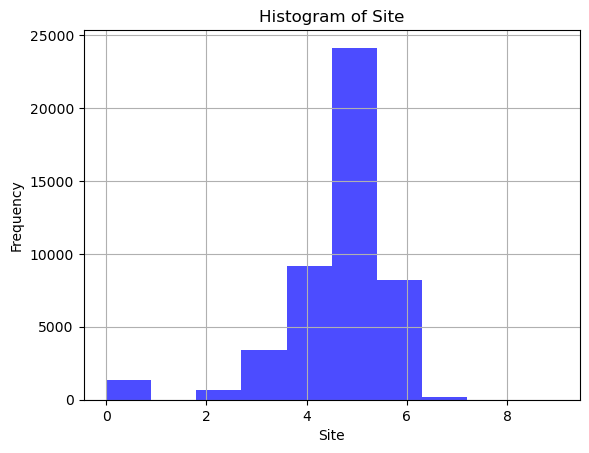

In [51]:
# Specify the feature class and the field for which you want to create a histogram
feature_class = "strata"
field_name = "Site"

# Create a list of values from the specified field
values = [row[0] for row in arcpy.da.SearchCursor(feature_class, field_name)]

# Plot histogram
plt.hist(values, bins=10, color='blue', alpha=0.7)
plt.title("Histogram of {}".format(field_name))
plt.xlabel(field_name)
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [49]:
fc = strata
with arcpy.da.UpdateCursor(fc, ["Site","Theme2"]) as cursor:
  for row in cursor:
         if row[0] < 2.5 : 
            row[1] = "Low"
            cursor.updateRow(row)
         elif  row[0] > 2.5 and row[0] < 5.5:
            row[1] = "Medium"
            cursor.updateRow(row)
         else:
             row[1] = "High"
             cursor.updateRow(row)
            
case_field = "Theme2"
mean_field = "Site"

# Create a dictionary to store means for each case value
mean_dict = defaultdict(float)
count_dict = defaultdict(int)

# Iterate over the feature class to calculate means
with arcpy.da.SearchCursor(fc, [case_field, mean_field]) as cursor:
    for row in cursor:
        case_value = row[0]
        mean_value = row[1]
        mean_dict[case_value] += mean_value
        count_dict[case_value] += 1

# Calculate mean for each case value
for case_value, total in mean_dict.items():
    mean_dict[case_value] = total / count_dict[case_value]

# Print mean values
for case_value, mean_value in mean_dict.items():
    print(f"Case: {case_value}, Mean: {mean_value}")
    
    
    
    

Case: Medium, Mean: 4.563599716729313
Case: High, Mean: 6.0290061816452685
Case: Low, Mean: 0.6587608906098742


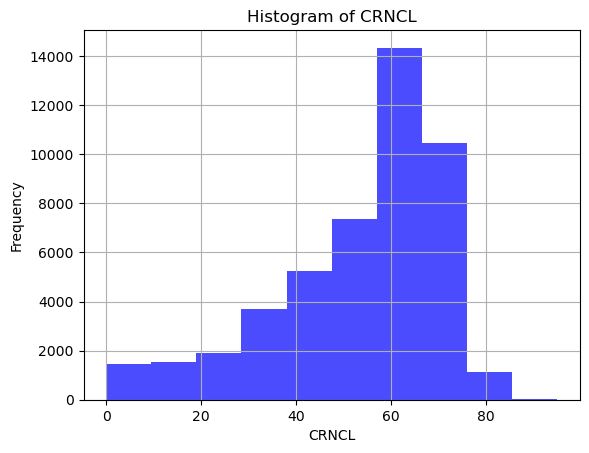

In [57]:
# Specify the feature class and the field for which you want to create a histogram
feature_class = "strata"
field_name = "CRNCL"

# Create a list of values from the specified field
values = [row[0] for row in arcpy.da.SearchCursor(feature_class, field_name)]

# Plot histogram
plt.hist(values, bins=10, color='blue', alpha=0.7)
plt.title("Histogram of {}".format(field_name))
plt.xlabel(field_name)
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



In [58]:
fc = strata
with arcpy.da.UpdateCursor(fc, ["CRNCL","Theme3"]) as cursor:
  for row in cursor:
         if row[0] < 40 : 
            row[1] = "Low"
            cursor.updateRow(row)
         elif  row[0] > 40 and row[0] < 65:
            row[1] = "Medium"
            cursor.updateRow(row)
         else:
             row[1] = "High"
             cursor.updateRow(row)
            
            
case_field = "Theme3"
            
            
mean_field = "CRNCL"

# Create a dictionary to store means for each case value
mean_dict = defaultdict(float)
count_dict = defaultdict(int)

# Iterate over the feature class to calculate means
with arcpy.da.SearchCursor(fc, [case_field, mean_field]) as cursor:
    for row in cursor:
        case_value = row[0]
        mean_value = row[1]
        mean_dict[case_value] += mean_value
        count_dict[case_value] += 1

# Calculate mean for each case value
for case_value, total in mean_dict.items():
    mean_dict[case_value] = total / count_dict[case_value]

# Print mean values
for case_value, mean_value in mean_dict.items():
    print(f"Case: {case_value}, Mean: {mean_value}")

Case: High, Mean: 65.64230390688519
Case: Medium, Mean: 54.09356341447412
Case: Low, Mean: 21.493241668608714


In [14]:
fc = strata
with arcpy.da.UpdateCursor(fc, ["fornon","Theme4"]) as cursor:
  for row in cursor:
         if row[0] == 0 : 
            row[1] = "Natural"
            cursor.updateRow(row)
         elif  row[0] == 20:
            row[1] = "Plantation"
         elif  row[0] == 1 or row[0] == 12:
            row[1] = "Pct"
            cursor.updateRow(row)
         elif  row[0] == 60:
            row[1] = "Clearcut"
            cursor.updateRow(row)
         elif  row[0] == 61 or row[0] == 62:
            row[1] = "Partialcut"
            cursor.updateRow(row)
         else:
             row[1] = "Other"
             cursor.updateRow(row)
print("finished updating management history")            

finished updating management history


In [15]:
fc = strata
with arcpy.da.UpdateCursor(fc, ["Cover_Type","Theme5"]) as cursor:
  for row in cursor:
         if row[0] == 2 : 
            row[1] = "SWD"
            cursor.updateRow(row)
         elif  row[0] == 5:
            row[1] = "MWD"
            cursor.updateRow(row)
         else:
             row[1] = "HWD"
             cursor.updateRow(row)
print("finished updating Cover Type") 

finished updating Cover Type


In [16]:
ELC =  "D:/2024/forest_planning/Annapolis/Forest.gdb/ELC"

In [17]:
arcpy.analysis.Identity(strata, ELC, "strata_ELC")

<Result 'D:/2024/forest_planning/Annapolis/Forest.gdb/strata_ELC'>

In [18]:
fc = "strata_ELC"


  

arcpy.AddField_management(fc, "Theme6", "Text")
arcpy.AddField_management(fc, "Theme7", "Text")
arcpy.AddField_management(fc, "Theme8", "Text")
arcpy.AddField_management(fc, "Theme9", "Text")
arcpy.AddField_management(fc, "Theme10", "Text")
arcpy.AddField_management(fc, "Theme11", "Text")
arcpy.AddField_management(fc, "Theme12", "Text")
arcpy.AddField_management(fc, "Theme13", "Text")
arcpy.AddField_management(fc, "Theme14", "Text")





# List of fields to be updated
update_fields = [ "Theme6", "Theme7", "Theme8", "Theme9",
                 "Theme10", "Theme11", "Theme12", "Theme13",  "Theme14"]

# List of fields to read from (source fields)
source_fields = ["ECOREGION", "ECODISTRIC", "ECOSECTION", "ELC", "NDR",
                 "DRAINAGE", "TEXTURE", "TOPOGRAPHY", "ELEMENT"]

# Start update cursor
with arcpy.da.UpdateCursor(fc, update_fields + source_fields) as cursor:
    for row in cursor:
        # Update each field with the content of its corresponding source field
        for i in range(9):
            row[i] = row[i + 9]  # Assigning source field values to update fields
        cursor.updateRow(row)

# Delete cursor and row objects explicitly (optional)
del cursor, row
print("Stratification completed")

Stratification completed


In [19]:

listfc =          ["Theme1",
                   "Theme2",
                    "Theme3",
                  "Theme4","Theme5","Theme6","Theme7","Theme8","Theme9","Theme10","Theme11","Theme12","Theme13","Theme14","AGE"]
                        
             






        
        
arcpy.Delete_management("res_for")     
print("Dissolving")
arcpy.management.Dissolve("strata_ELC", "res_for",listfc, "", 
                          "SINGLE_PART", "DISSOLVE_LINES")

fc="res_for"
sql_query = "AGE > 0 and AGE < 999 and Theme1 not in ('UC','UH', 'US')"

try:
    # Create a new feature class containing features based on the SQL query
    arcpy.Select_analysis(fc,"final_for", sql_query)
    print("New feature class created successfully.")
except arcpy.ExecuteError:
    print(arcpy.GetMessages())



print("Finished Dissolving")

Dissolving
New feature class created successfully.
Finished Dissolving


In [20]:
sql_query = "NAME = 'Annapolis'"

try:
    # Create a new feature class containing features based on the SQL query
    arcpy.Select_analysis(county,"Annapolis", sql_query)
    print("New feature class created successfully.")
except arcpy.ExecuteError:
    print(arcpy.GetMessages())

New feature class created successfully.


In [21]:
arcpy.analysis.Clip(streams, "Annapolis", "streams_Annapolis")

<Result 'D:/2024/forest_planning/Annapolis/Forest.gdb/streams_Annapolis'>

In [22]:
arcpy.analysis.Clip(lakes, "Annapolis", "lakes_Annapolis")

<Result 'D:/2024/forest_planning/Annapolis/Forest.gdb/lakes_Annapolis'>

In [23]:
arcpy.analysis.Clip(roads, "Annapolis", "roads_Annapolis")

<Result 'D:/2024/forest_planning/Annapolis/Forest.gdb/roads_Annapolis'>

In [24]:
arcpy.analysis.Erase("streams_Annapolis", "lakes", 
                    "streams_Annapolis_clip")

arcpy.analysis.Buffer("streams_Annapolis_clip", "streamBuffer", 20, "FULL", "ROUND", 
                      "", "FEAT_CODE")
print("finished buffering streams")


finished buffering streams


In [25]:
arcpy.analysis.Buffer("lakes_Annapolis", "lakeBuffer", 20, "FULL", "ROUND", 
                      "", "FEAT_CODE")
print("Finished Buffering Lakes")

Finished Buffering Lakes


In [26]:
arcpy.analysis.Frequency("roads_Annapolis", "rdlut", "ROADCLASS", "SHAPE_Length")

<Result 'D:/2024/forest_planning/Annapolis/Forest.gdb/rdlut'>

In [27]:
arcpy.management.JoinField("roads_Annapolis", "ROADCLASS", "roadlut", "ROADCLASS", 
                           ["WIDTH"])




roads = "roads_Annapolis"
roadsBuffer = "Roadbuffer"
distanceField = "WIDTH"
sideType = "FULL"
endType = "ROUND"
dissolveType = "LIST"
dissolveField = "WIDTH"
arcpy.analysis.Buffer(roads, roadsBuffer, distanceField, sideType, endType, 
                      dissolveType, dissolveField)
print("Finished Buffering Roads")

Finished Buffering Roads


In [28]:
arcpy.analysis.Clip("crown", "Annapolis", "crown_Annapolis")
arcpy.AddField_management("crown_annapolis", "Theme19", "Text")
fc = "crown_annapolis"
with arcpy.da.UpdateCursor(fc, ["Theme19"]) as cursor:
    for row in cursor:
            row[0] = "Crown"
            cursor.updateRow(row)
print("Finshed clipping and renaming Theme19 for Annapolis County")           

Finshed clipping and renaming Theme19 for Annapolis County


In [29]:
arcpy.Delete_management("final_union_result")  


dsc = arcpy.SpatialReference(2961)

arcpy.Project_management("Roadbuffer","Roadbufferprj", dsc)
arcpy.Project_management("streamBuffer","streamBufferprj", dsc)
arcpy.Project_management("lakeBuffer","lakeBufferprj", dsc)
feature_classes = ["Roadbufferprj", "streamBufferprj", "lakeBufferprj"]
print("Finished projecting")
try:
  
    arcpy.AddField_management("Roadbufferprj", "Theme15", "Text")
    arcpy.AddField_management("streamBufferprj", "Theme16", "Text")
    arcpy.AddField_management("lakebufferprj", "Theme17", "Text")
    
    arcpy.management.CalculateField("Roadbufferprj", "Theme15", 
                                "'rdbuff'",
                                "PYTHON3")
    arcpy.management.CalculateField("streamBufferprj", "Theme16", 
                                "'stbuff'",
                                "PYTHON3")
    arcpy.management.CalculateField("lakeBufferprj", "Theme17", 
                                "'lkbuff'", "PYTHON3")
    print("Done adding fields")
except:
    pass


# Output feature class
output_fc = "union_result"

# Create an empty list to hold union results
union_results = []

# Loop through each feature class
for fc in feature_classes:
    # Perform Union operation
    union_result = arcpy.Union_analysis([ "lakeBufferprj", "StreamBufferprj","Roadbufferprj"], output_fc + "_" + fc)
    print(output_fc + "_" + fc)
    union_results.append(union_result)
print("Merging buffered features")
# Merge all union results into a single feature class
final_union = arcpy.Merge_management(union_results, "final_union_result")

print("Union operation completed successfully.")

Finished projecting
Done adding fields
union_result_Roadbufferprj
union_result_streamBufferprj
union_result_lakeBufferprj
Merging buffered features
Union operation completed successfully.


In [30]:
if not arcpy.ListFields("final_union_result", "Theme17"):
    arcpy.AddField_management("final_union_result", "Theme18", "TEXT")

expression = "!{}! + '' + !{}! + '' + !{}!".format("Theme15", "Theme16", "Theme17")
arcpy.CalculateField_management("final_union_result","Theme18", expression, "PYTHON")



print("Values concatenated and stored in the new field successfully.")

Values concatenated and stored in the new field successfully.


In [31]:

listfc =          ["Theme15",
                   "Theme16",
                    "Theme17","Theme18"]
                        
             






        
        
arcpy.Delete_management("res_dis")     
print("Dissolving")
arcpy.management.Dissolve("final_union_result", "res_dis",listfc, "", 
                          "SINGLE_PART", "DISSOLVE_LINES")
arcpy.Delete_management("resultant") 

Dissolving


<Result 'true'>

In [32]:

arcpy.analysis.Identity("final_for", "res_dis", "resultantf")
arcpy.analysis.Identity("resultantf", "crown_Annapolis", "resultants")
fc = "resultants"
with arcpy.da.UpdateCursor(fc, ["Theme19"]) as cursor:
  for row in cursor:
         if row[0] != "Crown" : 
            row[0] = "Private"
            cursor.updateRow(row)
             
         else:
             row[0] = "Crown"
             cursor.updateRow(row)
print("finished updating ownership") 



finished updating ownership


In [33]:

fc = "resultants"

# List of fields to update
fields_to_update = ["Theme1", "Theme2", "Theme3", "Theme4", "Theme5",
                    "Theme6", "Theme7", "Theme8", "Theme9", "Theme10",
                    "Theme11", "Theme12", "Theme13", "Theme14", "Theme15","Theme16","Theme17","Theme18","Theme19"]

# Start an edit session
edit = arcpy.da.Editor(arcpy.env.workspace)
edit.startEditing(False, True)

# Start an edit operation
edit.startOperation()

# Use an UpdateCursor to update fields with NULL values to None
with arcpy.da.UpdateCursor(fc, fields_to_update) as cursor:
    for row in cursor:
        for i in range(len(row)):
            if row[i] is None or row[i] == "":
                row[i] = "None"
        cursor.updateRow(row)

# Stop the edit operation
edit.stopOperation()

# Stop the edit session and save the changes
edit.stopEditing(True)
print("Finished updating Null values")           
            


Finished updating Null values


In [34]:
fc = "resultants"
arcpy.AddField_management(fc, "WK_AGE", "FLOAT")



# Field to be calculated
field_to_calculate = "WK_AGE"

# Start an edit session
edit = arcpy.da.Editor(arcpy.env.workspace)
edit.startEditing(False, True)

# Start an update cursor
with arcpy.da.UpdateCursor(fc,["AGE","WK_AGE"]) as cursor:
    for row in cursor:
        # Calculate the new value by dividing the existing value by 5 and then rounding it to 0
        new_value = round(row[0] / 5)
        # Update the field value
        row[1] = new_value
        cursor.updateRow(row)

# Stop the edit session and save the changes
edit.stopEditing(True)
print("Updated Woodstock Age")

Updated Woodstock Age


In [35]:
fc = "resultants"

try:
  
    arcpy.AddField_management(fc, "Hectares", "Float")
  
except:
     pass

arcpy.management.CalculateField(fc, field="Hectares", expression="!Shape_Area!/10000", expression_type="PYTHON3", code_block="", field_type="FLOAT", enforce_domains="NO_ENFORCE_DOMAINS")[0]
print("finished adding hectares")


finished adding hectares


In [36]:
fc = "resultants"


listfc = ["Theme1","Theme2","Theme3","Theme4","Theme5","Theme6","Theme7","Theme8","Theme9","Theme10",\
          "Theme11","Theme12","Theme13","Theme14","Theme15","Theme16","Theme17","Theme18","Theme19","WK_AGE"]

                  
           
        
arcpy.Delete_management("res_dis")     
print("Dissolving")
arcpy.management.Dissolve("resultants", "res_dis",listfc, "", 
                          "SINGLE_PART", "DISSOLVE_LINES")



areaFieldName = "Shape_Area"
area = arcpy.Describe("res_dis").AreaFieldName
arcpy.MakeFeatureLayer_management("res_dis", "lyr")
arcpy.SelectLayerByAttribute_management("lyr", "NEW_SELECTION", area +' < 1000')
arcpy.Eliminate_management("lyr", "res_elim", "LENGTH")
print("finished eleminating small polygons")


Dissolving
finished eleminating small polygons


In [37]:
#fc="res_dis"
#arcpy.management.CalculateField(fc, field="Hectares", expression="round(!Shape_Area!/10000,2)", expression_type="PYTHON3", code_block="", field_type="FLOAT", enforce_domains="NO_ENFORCE_DOMAINS")[0]
#print("finished adding hectares")







#feature_class = fc  # Change this to your feature class name
#field_name = "Theme14"  # Change this to your field name

# Start an edit session
#edit = arcpy.da.Editor(arcpy.env.workspace)
#edit.startEditing(False, True)

# Start an edit operation
#edit.startOperation()

# Remove white spaces from the field
#with arcpy.da.UpdateCursor(feature_class, field_name) as cursor:
#    for row in cursor:
#        if row[0] is not None:  # Check if the value is not None
#            row[0] = row[0].replace(" ", "")  # Remove white spaces
#            cursor.updateRow(row)

# Stop the edit operation
#edit.stopOperation()

# Stop the edit session
#edit.stopEditing(True)

#print("White spaces removed from the field.")


In [38]:

#input_feature_class = "res_dis"

# Set the output shapefile name and location
#output_shapefile = r"D:\2024\forest_planning\area_file\annapolis.shp"

# Use the Copy Features tool to export the feature class to a shapefile
#arcpy.CopyFeatures_management(input_feature_class, output_shapefile)
#print("Finished exporting shape file")
#print ('It took ', round((time.time()-Start)/60,1), " minutes to run this script.")

In [39]:

# Define the feature class or table
input_feature_class = "res_dis"

# Define the fields to be used for summarization
fields = ["Hectares", "Theme1"]

# Create a dictionary to store the sum of hectares for each fornon code
summary_dict = {}

# Use the SearchCursor to iterate over the features or rows
with arcpy.da.SearchCursor(input_feature_class, fields) as cursor:
    for row in cursor:
        hectares = row[0]  # Hectares value
        fornon_code = row[1]  # Fornon code
        
        # Check if the fornon code exists in the summary dictionary
        if fornon_code in summary_dict:
            # If exists, add hectares value to the existing sum
            summary_dict[fornon_code] += hectares
        else:
            # If not exists, initialize the sum with hectares value
            summary_dict[fornon_code] = hectares

# Extract codes and sum of hectares
codes = list(summary_dict.keys())
sum_hectares = list(summary_dict.values())

# Plotting
plt.bar(codes, sum_hectares)
plt.xlabel('Species')
plt.ylabel('Sum of Hectares')
plt.title('Sum of Hectares for each Species')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

RuntimeError: Cannot find field 'Hectares'

In [ ]:

# Define the feature class or table
input_feature_class = "res_dis"

# Define the fields to be used for summarization
fields = ["Hectares", "Theme2"]

# Create a dictionary to store the sum of hectares for each fornon code
summary_dict = {}

# Use the SearchCursor to iterate over the features or rows
with arcpy.da.SearchCursor(input_feature_class, fields) as cursor:
    for row in cursor:
        hectares = row[0]  # Hectares value
        fornon_code = row[1]  # Fornon code
        
        # Check if the fornon code exists in the summary dictionary
        if fornon_code in summary_dict:
            # If exists, add hectares value to the existing sum
            summary_dict[fornon_code] += hectares
        else:
            # If not exists, initialize the sum with hectares value
            summary_dict[fornon_code] = hectares

# Extract codes and sum of hectares
codes = list(summary_dict.keys())
sum_hectares = list(summary_dict.values())

# Plotting
plt.bar(codes, sum_hectares)
plt.xlabel('Land Capability')
plt.ylabel('Sum of Hectares')
plt.title('Sum of Hectares for each LC Class')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:

# Define the feature class or table
input_feature_class = "res_dis"

# Define the fields to be used for summarization
fields = ["Hectares", "Theme3"]

# Create a dictionary to store the sum of hectares for each fornon code
summary_dict = {}

# Use the SearchCursor to iterate over the features or rows
with arcpy.da.SearchCursor(input_feature_class, fields) as cursor:
    for row in cursor:
        hectares = row[0]  # Hectares value
        fornon_code = row[1]  # Fornon code
        
        # Check if the fornon code exists in the summary dictionary
        if fornon_code in summary_dict:
            # If exists, add hectares value to the existing sum
            summary_dict[fornon_code] += hectares
        else:
            # If not exists, initialize the sum with hectares value
            summary_dict[fornon_code] = hectares

# Extract codes and sum of hectares
codes = list(summary_dict.keys())
sum_hectares = list(summary_dict.values())

# Plotting
plt.bar(codes, sum_hectares)
plt.xlabel('Crown Closure')
plt.ylabel('Sum of Hectares')
plt.title('Sum of Hectares for each Crown Closure Class')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:

# Define the feature class or table
input_feature_class = "res_dis"

# Define the fields to be used for summarization
fields = ["Hectares", "Theme4"]

# Create a dictionary to store the sum of hectares for each fornon code
summary_dict = {}

# Use the SearchCursor to iterate over the features or rows
with arcpy.da.SearchCursor(input_feature_class, fields) as cursor:
    for row in cursor:
        hectares = row[0]  # Hectares value
        fornon_code = row[1]  # Fornon code
        
        # Check if the fornon code exists in the summary dictionary
        if fornon_code in summary_dict:
            # If exists, add hectares value to the existing sum
            summary_dict[fornon_code] += hectares
        else:
            # If not exists, initialize the sum with hectares value
            summary_dict[fornon_code] = hectares

# Extract codes and sum of hectares
codes = list(summary_dict.keys())
sum_hectares = list(summary_dict.values())

# Plotting
plt.bar(codes, sum_hectares)
plt.xlabel('Management History')
plt.ylabel('Sum of Hectares')
plt.title('Sum of Hectares for Management History')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:

# Define the feature class or table
input_feature_class = "res_dis"

# Define the fields to be used for summarization
fields = ["Hectares", "Theme5"]

# Create a dictionary to store the sum of hectares for each fornon code
summary_dict = {}

# Use the SearchCursor to iterate over the features or rows
with arcpy.da.SearchCursor(input_feature_class, fields) as cursor:
    for row in cursor:
        hectares = row[0]  # Hectares value
        fornon_code = row[1]  # Fornon code
        
        # Check if the fornon code exists in the summary dictionary
        if fornon_code in summary_dict:
            # If exists, add hectares value to the existing sum
            summary_dict[fornon_code] += hectares
        else:
            # If not exists, initialize the sum with hectares value
            summary_dict[fornon_code] = hectares

# Extract codes and sum of hectares
codes = list(summary_dict.keys())
sum_hectares = list(summary_dict.values())

# Plotting
plt.bar(codes, sum_hectares)
plt.xlabel('Cover Type')
plt.ylabel('Sum of Hectares')
plt.title('Sum of Hectares for each Cover Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:

# Define the feature class or table
input_feature_class = "res_dis"

# Define the fields to be used for summarization
fields = ["Hectares", "Theme10"]

# Create a dictionary to store the sum of hectares for each fornon code
summary_dict = {}

# Use the SearchCursor to iterate over the features or rows
with arcpy.da.SearchCursor(input_feature_class, fields) as cursor:
    for row in cursor:
        hectares = row[0]  # Hectares value
        fornon_code = row[1]  # Fornon code
        
        # Check if the fornon code exists in the summary dictionary
        if fornon_code in summary_dict:
            # If exists, add hectares value to the existing sum
            summary_dict[fornon_code] += hectares
        else:
            # If not exists, initialize the sum with hectares value
            summary_dict[fornon_code] = hectares

# Extract codes and sum of hectares
codes = list(summary_dict.keys())
sum_hectares = list(summary_dict.values())

# Plotting
plt.bar(codes, sum_hectares)
plt.xlabel('NDR')
plt.ylabel('Sum of Hectares')
plt.title('Sum of Hectares for each NDR')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:

# Define the feature class or table
input_feature_class = "res_dis"
fc= "Buffers"

sql_query = "Theme18 <> 'None'"

try:
    # Create a new feature class containing features based on the SQL query
    arcpy.Select_analysis(input_feature_class,"Buffers", sql_query)
    print("New feature class created successfully.")
except arcpy.ExecuteError:
    print(arcpy.GetMessages())
print("finished exporting Buffers")


In [ ]:
fc =  "D:/2024/forest_planning/Annapolis/Forest.gdb/Buffers"

# Define the fields to be used for summarization
fields = ["Hectares", "Theme18"]

# Create a dictionary to store the sum of hectares for each fornon code
summary_dict = {}

# Use the SearchCursor to iterate over the features or rows
with arcpy.da.SearchCursor(fc, fields) as cursor:
    for row in cursor:
        hectares = row[0]  # Hectares value
        fornon_code = row[1]  # Fornon code
        
        # Check if the fornon code exists in the summary dictionary
        if fornon_code in summary_dict:
            # If exists, add hectares value to the existing sum
            summary_dict[fornon_code] += hectares
        else:
            # If not exists, initialize the sum with hectares value
            summary_dict[fornon_code] = hectares

# Extract codes and sum of hectares
codes = list(summary_dict.keys())
sum_hectares = list(summary_dict.values())

# Plotting
plt.bar(codes, sum_hectares)
plt.xlabel('Buffer Type')
plt.ylabel('Sum of Hectares')
plt.title('Sum of Hectares by Buffer Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
fc =  "D:/2024/forest_planning/Annapolis/Forest.gdb/Buffers"
field = "Theme18"
# Create a cursor to iterate through the features
cursor = arcpy.da.SearchCursor(fc, [field])

# Initialize an empty dictionary to store the count of each unique value
data_dict = {}

# Iterate through the cursor and count occurrences of each unique value
for row in cursor:
    value = row[0]
    if value in data_dict:
        data_dict[value] += 1
    else:
        data_dict[value] = 1

# Close the cursor
del cursor

# Extract values and labels from the dictionary
values = list(data_dict.values())
labels = list(data_dict.keys())

# Plotting the pie chart using matplotlib
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart of {}'.format(field))
plt.show()

In [ ]:

# Define the feature class or table
input_feature_class = "res_dis"

# Define the fields to be used for summarization
fields = ["Hectares", "WK_AGE"]

# Create a dictionary to store the sum of hectares for each fornon code
summary_dict = {}

# Use the SearchCursor to iterate over the features or rows
with arcpy.da.SearchCursor(input_feature_class, fields) as cursor:
    for row in cursor:
        hectares = row[0]  # Hectares value
        fornon_code = row[1]  # Fornon code
        
        # Check if the fornon code exists in the summary dictionary
        if fornon_code in summary_dict:
            # If exists, add hectares value to the existing sum
            summary_dict[fornon_code] += hectares
        else:
            # If not exists, initialize the sum with hectares value
            summary_dict[fornon_code] = hectares

# Extract codes and sum of hectares
codes = list(summary_dict.keys())
sum_hectares = list(summary_dict.values())

# Plotting
plt.bar(codes, sum_hectares)
plt.xlabel('Age Class')
plt.ylabel('Sum of Hectares')
plt.title('Sum of Hectares for each Age Class')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
fc = "res_dis"

# Fields containing species, age, and hectares information
species_field = "Theme5"
age_field = "WK_AGE"
hectares_field = "Hectares"


# Initialize a dictionary to store the sum of hectares for each combination of species and age
data_dict = {}

# Create a cursor to iterate through the features
with arcpy.da.SearchCursor(fc, [species_field, age_field, hectares_field]) as cursor:
    for row in cursor:
        species = row[0]
        age = row[1]
        hectares = row[2]
        
        # Check if the combination of species and age exists in the dictionary
        key = (species, age)
        if key in data_dict:
            # If exists, add hectares to the existing sum
            data_dict[key] += hectares
        else:
            # If not exists, initialize with hectares value
            data_dict[key] = hectares

# Close the cursor
del cursor

# Extract unique species and age values
species_labels = list(set([key[0] for key in data_dict.keys()]))
age_labels = list(set([key[1] for key in data_dict.keys()]))

# Sort labels for better visualization
species_labels.sort()
age_labels.sort()

# Initialize lists to store the stacked data
species_data = [[] for _ in range(len(species_labels))]
for i in range(len(species_labels)):
    for j in range(len(age_labels)):
        species_data[i].append(data_dict.get((species_labels[i], age_labels[j]), 0))

# Plotting the stacked bar chart using matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting each species as a stack
bottom = [0] * len(age_labels)
for i in range(len(species_labels)):
    ax.bar(age_labels, species_data[i], label=species_labels[i], bottom=bottom)
    bottom = [bottom[j] + species_data[i][j] for j in range(len(age_labels))]

# Customize the plot
ax.set_ylabel('Hectares')
ax.set_xlabel('Age')
ax.set_title('Stacked Bar Chart of Species groups and Age based on Hectares')
ax.legend()

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()